# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on = ["Mouse ID"])
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mouse = mouse_data_complete["Mouse ID"].count()

total_mouse






1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_data_complete = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False] 

clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mouse_ids)==False]






In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique()) 

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
reg_grouped = clean_data.groupby("Drug Regimen")
reg_grouped.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_vol = reg_grouped['Tumor Volume (mm3)'].mean()
median_tumor_vol = reg_grouped['Tumor Volume (mm3)'].median()
variance_tumor = reg_grouped['Tumor Volume (mm3)'].var()
std_dev_tumor = reg_grouped['Tumor Volume (mm3)'].std()
sem_tumor = reg_grouped['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
reg_summary_stats = pd.DataFrame(({'Mean Tumor Volume (mm3)': mean_tumor_vol,
                                  'Median Tumor Volume (mm3)': median_tumor_vol,
                                  'Tumor Volume Variance': variance_tumor,
                                  'Tumor Volume Std Dev': std_dev_tumor,
                                  'Tumor Volume SEM': sem_tumor}))
reg_summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
reg_grouped['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

,mean,var,sem,std,median
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,0.329346,4.994774,41.557809
Ceftamin,52.591172,39.290177,0.469821,6.268188,51.776157
Infubinol,52.884795,43.128684,0.492236,6.567243,51.820584
Ketapril,55.235638,68.553577,0.603860,8.279709,53.698743
Naftisol,54.331565,66.173479,0.596466,8.134708,52.509285
Placebo,54.033581,61.168083,0.581331,7.821003,52.288934
Propriva,52.320930,43.852013,0.544332,6.622085,50.446266
Ramicane,40.216745,23.486704,0.320955,4.846308,40.673236
Stelasyn,54.233149,59.450562,0.573111,7.710419,52.431737


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints Per Drug')

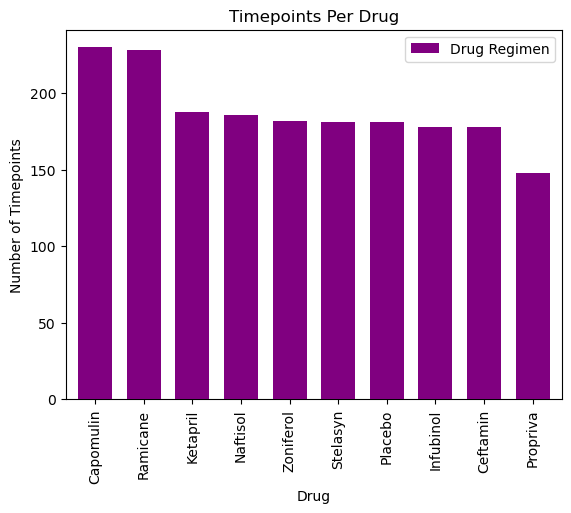

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = mouse_data_complete['Drug Regimen'].value_counts().plot.bar(color='purple', width=0.7, zorder=3)
pandas_bar.legend(loc=1)
pandas_bar.set_xlabel("Drug")
pandas_bar.set_ylabel("Number of Timepoints")
pandas_bar.set_title("Timepoints Per Drug")


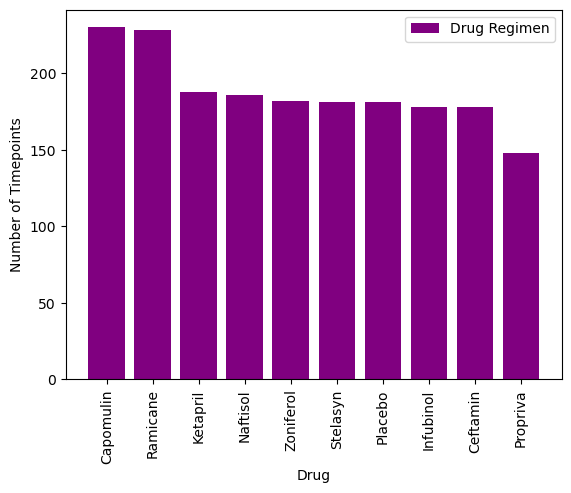

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np


y_axis = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color='purple', alpha=1, label='Drug Regimen')
plt.legend(loc="upper right")
plt.xlabel("Drug")
plt.ylabel("Number of Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.show()


<AxesSubplot:ylabel='Count'>

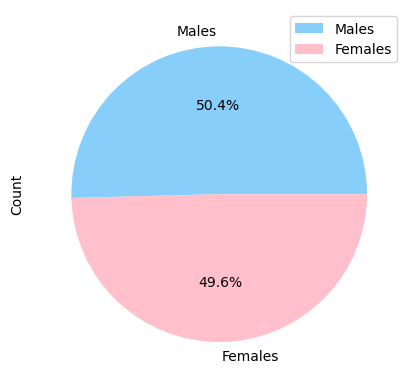

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_sex_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Female"]
female_count = female_sex_data["Mouse ID"].nunique()
male_sex_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == 'Male']
male_count = male_sex_data['Mouse ID'].nunique()
sex_data = [['Males', int(male_count)], ["Females", int(female_count)]]
sex_df = pd.DataFrame(sex_data, columns=['Sex', 'Count'])
sex_df = sex_df.set_index('Sex')
pie_labels = ['Males', 'Females']
pie_colors = ['lightskyblue', 'pink']
sex_df.plot(kind='pie', y='Count', autopct='%1.1f%%', colors=pie_colors, labels=pie_labels)

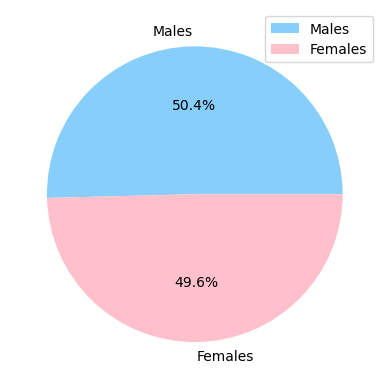

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list = [male_count, female_count]
plt.pie(sex_list, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%')
plt.legend(loc="upper right")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_mouse_data_complete = last_timepoint.merge(clean_data, how='left', on=['Mouse ID', 'Timepoint'])
last_timepoint_mouse_data_complete.tail(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
198,v409,10,50.649038,1,Placebo,Female,16,25
199,v603,35,63.189432,1,Ketapril,Female,22,30
200,v719,20,54.048608,1,Infubinol,Female,17,30
201,v764,15,49.412624,2,Stelasyn,Female,5,30
202,v766,15,51.542431,1,Infubinol,Male,16,27
203,v835,20,51.296543,2,Naftisol,Male,7,29
204,v923,45,40.658124,2,Capomulin,Female,19,21
205,v989,10,52.614689,1,Placebo,Male,4,25
206,v991,45,70.167749,4,Propriva,Female,10,30
207,w140,5,47.717952,0,Zoniferol,Female,19,30


In [15]:


# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []




# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes=last_timepoint_mouse_data_complete.loc[last_timepoint_mouse_data_complete["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_volumes)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


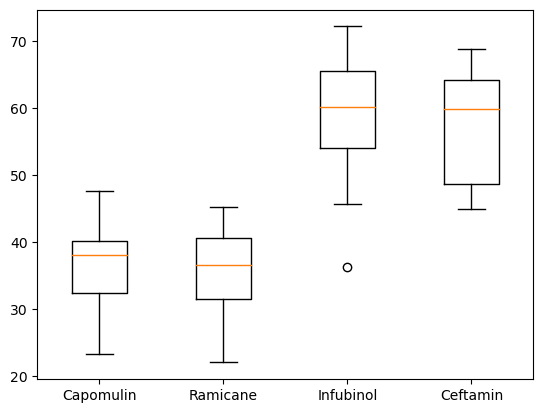

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels=four_regimens)
plt.show()
        

## Line and Scatter Plots

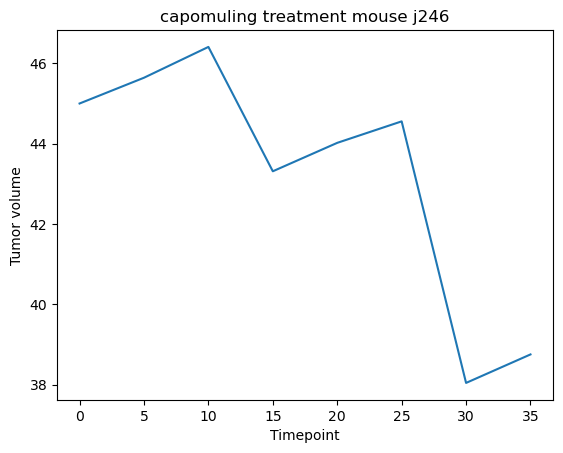

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
mouse_df = cap_df.loc[cap_df["Mouse ID"]=="j246"]
mouse_df
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])
plt.title("capomuling treatment mouse j246")
plt.xlabel ("Timepoint")
plt.ylabel ("Tumor volume")
plt.show()

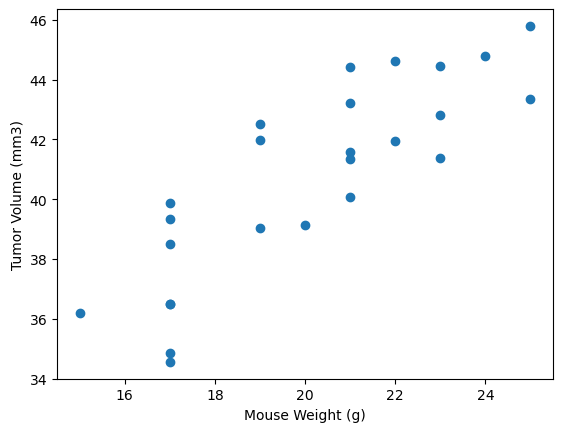

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen




capomulin_drug_df_avg=cap_df.groupby(["Mouse ID"]).mean()


plt.scatter(capomulin_drug_df_avg["Weight (g)"], capomulin_drug_df_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()




## Correlation and Regression

correlation coefficient between mouse wieght and tumor volume;-0.87


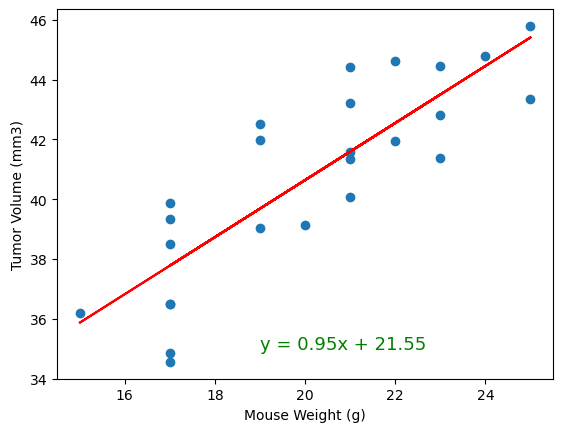

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_drug_df_avg['Weight (g)'], capomulin_drug_df_avg["Tumor Volume (mm3)"])
regress_values = (capomulin_drug_df_avg['Weight (g)'] * slope + intercept)
plt.plot(capomulin_drug_df_avg['Weight (g)'], regress_values, "r-")
plt.scatter(capomulin_drug_df_avg['Weight (g)'], capomulin_drug_df_avg["Tumor Volume (mm3)"])
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(19,35),fontsize=13,color="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"correlation coefficient between mouse wieght and tumor volume;{round(st.pearsonr(x_axis,y_axis)[0],2)}")
plt.show()
